In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
companies = ['ABB','ASYS','CCGI','CENX','CMI','FSLR','GE','PCRFY','TSLA']
prices_pd =pd.DataFrame()
volume_pd = pd.DataFrame()
for i in range(len(companies)):
    pd_comp = pd.read_csv("./data/"+companies[i]+".csv")
    pd_comp = pd_comp.iloc[::-1]
    prices_pd[companies[i]] = pd_comp["close"]
    volume_pd[companies[i]]= pd_comp["volume"]

ABB


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


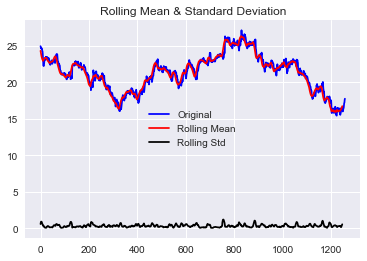

Results of Dickey-Fuller Test:
Test Statistic                   -2.159479
p-value                           0.221279
#Lags Used                        4.000000
Number of Observations Used    1253.000000
Critical Value (10%)             -2.568000
Critical Value (1%)              -3.435580
Critical Value (5%)              -2.863849
dtype: float64
ASYS


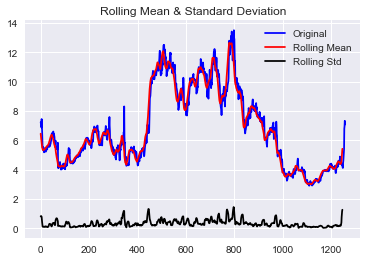

Results of Dickey-Fuller Test:
Test Statistic                   -1.886704
p-value                           0.338341
#Lags Used                        1.000000
Number of Observations Used    1256.000000
Critical Value (10%)             -2.567997
Critical Value (1%)              -3.435567
Critical Value (5%)              -2.863844
dtype: float64
CCGI


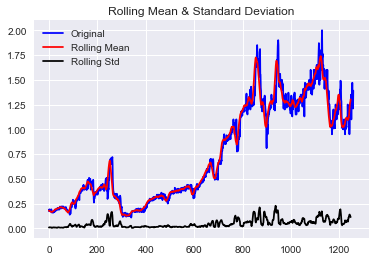

Results of Dickey-Fuller Test:
Test Statistic                   -1.155257
p-value                           0.692541
#Lags Used                       11.000000
Number of Observations Used    1246.000000
Critical Value (10%)             -2.568006
Critical Value (1%)              -3.435609
Critical Value (5%)              -2.863862
dtype: float64
CENX


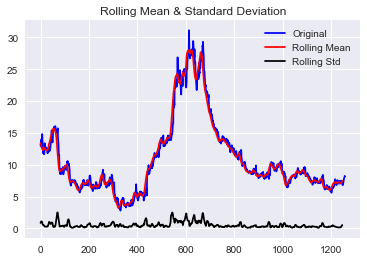

Results of Dickey-Fuller Test:
Test Statistic                   -1.603265
p-value                           0.481953
#Lags Used                       17.000000
Number of Observations Used    1240.000000
Critical Value (10%)             -2.568012
Critical Value (1%)              -3.435635
Critical Value (5%)              -2.863874
dtype: float64
CMI


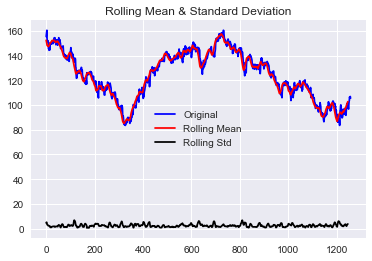

Results of Dickey-Fuller Test:
Test Statistic                   -1.252669
p-value                           0.650539
#Lags Used                        5.000000
Number of Observations Used    1252.000000
Critical Value (10%)             -2.568001
Critical Value (1%)              -3.435584
Critical Value (5%)              -2.863851
dtype: float64
FSLR


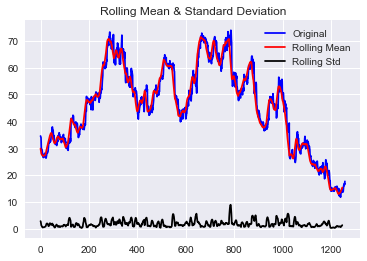

Results of Dickey-Fuller Test:
Test Statistic                   -2.141198
p-value                           0.228275
#Lags Used                        0.000000
Number of Observations Used    1257.000000
Critical Value (10%)             -2.567996
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
dtype: float64
GE


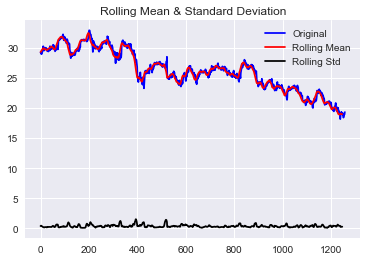

Results of Dickey-Fuller Test:
Test Statistic                   -2.086911
p-value                           0.249810
#Lags Used                        0.000000
Number of Observations Used    1257.000000
Critical Value (10%)             -2.567996
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
dtype: float64
PCRFY


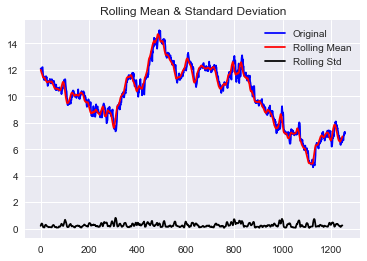

Results of Dickey-Fuller Test:
Test Statistic                   -1.733012
p-value                           0.414189
#Lags Used                        1.000000
Number of Observations Used    1256.000000
Critical Value (10%)             -2.567997
Critical Value (1%)              -3.435567
Critical Value (5%)              -2.863844
dtype: float64
TSLA


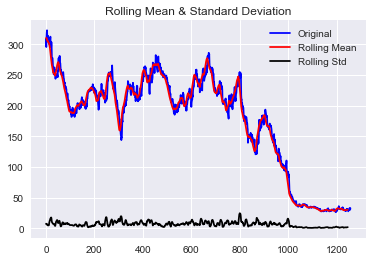

Results of Dickey-Fuller Test:
Test Statistic                   -1.237998
p-value                           0.657040
#Lags Used                        0.000000
Number of Observations Used    1257.000000
Critical Value (10%)             -2.567996
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
dtype: float64


In [3]:
#Checking for stationary or non-stationary time series
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
#evelautiong results for each time series
for company in companies:
    print(company)
    test_stationarity(prices_pd[company])

In [4]:
prices_pd.corr()

,ABB,ASYS,CCGI,CENX,CMI,FSLR,GE,PCRFY,TSLA
ABB,1.000000,0.496245,0.204322,0.372666,0.751447,0.340653,0.201253,0.446606,0.297199
ASYS,0.496245,1.000000,-0.189891,0.649244,0.672866,0.667945,0.137238,0.786246,0.566614
CCGI,0.204322,-0.189891,1.000000,-0.152168,-0.228647,-0.293842,-0.712928,-0.556026,-0.769130
CENX,0.372666,0.649244,-0.152168,1.000000,0.673381,0.297181,-0.043355,0.516047,0.367117
CMI,0.751447,0.672866,-0.228647,0.673381,1.000000,0.333860,0.300064,0.720554,0.597619
FSLR,0.340653,0.667945,-0.293842,0.297181,0.333860,1.000000,0.433516,0.571044,0.586717
GE,0.201253,0.137238,-0.712928,-0.043355,0.300064,0.433516,1.000000,0.471670,0.747315
PCRFY,0.446606,0.786246,-0.556026,0.516047,0.720554,0.571044,0.471670,1.000000,0.810389
TSLA,0.297199,0.566614,-0.769130,0.367117,0.597619,0.586717,0.747315,0.810389,1.000000


In [5]:
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts


def cointegration_test(y, x):
    # Step 1: regress one variable on the other 
    ols_result = sm.OLS(y, x).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)


#coin_result=ts.coint(x,y)
for i in range(len(companies)):
    for j in range(len(companies)):
        print(companies[i] + " and " + companies[j])
        print(cointegration_test(prices_pd[companies[i]], prices_pd[companies[j]]))

ABB and ABB
(-8.1768576756102611, 8.332105710212273e-13, 18, 1239, {'10%': -2.5680134763122906, '1%': -3.4356388617969351, '5%': -2.8638755475017179}, -82557.391451910444)
ABB and ASYS
(-2.1100914445048504, 0.24047619043182317, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 2802.5812322058696)
ABB and CCGI
(-1.5685922800909393, 0.49934870513222224, 7, 1250, {'10%': -2.5680025177600001, '1%': -3.4355922237096959, '5%': -2.8638549702604803}, 3560.0652498826221)
ABB and CENX
(-1.7166342428335795, 0.42256303462400957, 17, 1240, {'10%': -2.5680124720343391, '1%': -3.4356345877073822, '5%': -2.8638736617392837}, 2550.5202432909859)
ABB and CMI
(-2.4646190120851301, 0.12432189866393722, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 568.36832280687531)
ABB and FSLR
(-1.8015039554821912, 0.37971527751423151, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 2345.6

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


(nan, nan, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, -inf)
ASYS and CCGI
(-1.5025077672653246, 0.5322704195320983, 1, 1256, {'10%': -2.5679966213893057, '1%': -3.4355671297788666, '5%': -2.8638438984080117}, 1283.6484257356637)
ASYS and CENX
(-2.443043060199237, 0.12995440555493731, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 841.93732973386022)
ASYS and CMI
(-2.2185225553814143, 0.19959164960305137, 4, 1253, {'10%': -2.5679995625056926, '1%': -3.4355796466416777, '5%': -2.8638494210640242}, 298.62452416263022)
ASYS and FSLR
(-2.9941736369377727, 0.035442103391001047, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 519.09494262674843)
ASYS and GE
(-1.7832060509477095, 0.38883071958079951, 4, 1253, {'10%': -2.5679995625056926, '1%': -3.4355796466416777, '5%': -2.8638494210640242}, 207.62144817044873)
ASYS and PCRFY
(-3.0317913602285689, 0.03203026

(-3.1165479635779585, 0.02535255662798578, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 1157.3926897958972)
PCRFY and CCGI
(-1.0564080117952492, 0.73213931653945141, 11, 1246, {'10%': -2.5680064802681581, '1%': -3.4356090875394525, '5%': -2.863862410805964}, 1557.347584544714)
PCRFY and CENX
(-1.7153646846147579, 0.42321402154507287, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 1052.5461832677001)
PCRFY and CMI
(-2.4988408549701231, 0.11575661206312171, 1, 1256, {'10%': -2.5679966213893057, '1%': -3.4355671297788666, '5%': -2.8638438984080117}, -441.84451522990003)
PCRFY and FSLR
(-2.0500539044743888, 0.26506625240484749, 0, 1257, {'10%': -2.567995644141416, '1%': -3.4355629707955395, '5%': -2.8638420633876671}, 756.82749872552722)
PCRFY and GE
(-1.7705776178513735, 0.39516379303794003, 1, 1256, {'10%': -2.5679966213893057, '1%': -3.4355671297788666, '5%': -2.8638438984080117}, -656.3080961455

In [6]:
#claculating mutual information
def calc_MI(X,Y,bins):

   c_XY = np.histogram2d(X,Y,bins)[0]
   c_X = np.histogram(X,bins)[0]
   c_Y = np.histogram(Y,bins)[0]

   H_X = shan_entropy(c_X)
   H_Y = shan_entropy(c_Y)
   H_XY = shan_entropy(c_XY)

   MI = H_X + H_Y - H_XY
   return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

A = np.array([[ 2.0,  140.0,  128.23, -150.5, -5.4  ],
              [ 2.4,  153.11, 130.34, -130.1, -9.5  ],
              [ 1.2,  156.9,  120.11, -110.45,-1.12 ]])

bins = 5 # ?
n = A.shape[1]
matMI = np.zeros((n, n))

In [7]:
import math

for i in range(len(companies)):
    for j in range(len(companies)):
        print(companies[i] + " and " + companies[j])
        mi = calc_MI(prices_pd[companies[i]], prices_pd[companies[j]],5)
        result= math.sqrt(1-math.exp(-2*mi))
        print(result)

ABB and ABB
0.9930835325900039
ABB and ASYS
0.6563638825420449
ABB and CCGI
0.6463310046255383
ABB and CENX
0.7917867875783938
ABB and CMI
0.8477779373030006
ABB and FSLR
0.7537365944026041
ABB and GE
0.7092268391523269
ABB and PCRFY
0.6463050226848835
ABB and TSLA
0.583959915716393
ASYS and ABB
0.6563638825420446
ASYS and ASYS
0.992345963425966
ASYS and CCGI
0.6659268200633036
ASYS and CENX
0.8003936566196165
ASYS and CMI
0.8152367489919783
ASYS and FSLR
0.7851297404327621
ASYS and GE
0.845392386911371
ASYS and PCRFY
0.8431177859671393
ASYS and TSLA
0.8016213508830572
CCGI and ABB
0.6463310046255386
CCGI and ASYS
0.6659268200633036
CCGI and CCGI
0.9885815204439402
CCGI and CENX
0.5883449370259736
CCGI and CMI
0.5217650351628962
CCGI and FSLR
0.6873964355941521
CCGI and GE
0.8318280851873184
CCGI and PCRFY
0.7221970042635785
CCGI and TSLA
0.854098117533508
CENX and ABB
0.7917867875783939
CENX and ASYS
0.8003936566196167
CENX and CCGI
0.5883449370259736
CENX and CENX
0.9864160187547262


In [8]:
final_pd=pd.DataFrame()
for i in range(len(companies)):
    mi = calc_MI(prices_pd['TSLA'],prices_pd[companies[i]],5)
    result= math.sqrt(1-math.exp(-2*mi))
    if result > 0.8:
        final_pd[companies[i]]=prices_pd[companies[i]]
        print("TSLA and " + companies[i])
        print(result)
        

TSLA and ASYS
0.8016213508830575
TSLA and CCGI
0.854098117533508
TSLA and GE
0.8649784443204203
TSLA and PCRFY
0.8520816741060941
TSLA and TSLA
0.9903861156680934


In [106]:
final_pd.to_csv("training.csv")

# CHECKING FOR GOOGLE TRENDS

In [131]:
trends = ["Batterytechnology","Chargingstations","ElectricCars","ElectricPowertrain","ElectricSedans",
          "ElectricSUVs","ElonMusk","Lithium-ionBatteries","Model3","ModelS","ModelX","Powerwall",
          "SolarCity","SolarPanels","Tesla","TeslaRoadster"]

trends_pd=pd.DataFrame()
for trend in trends:
    pd_temp = pd.read_csv("./google_trends/Tesla/"+trend+".csv")
    trends_pd[trend]=pd_temp["value"]
trends_pd["date"]=pd_temp.date

In [132]:
temp_df=trends_pd
i=0
n=1
while(i<len(pd_temp)):
    if n%5==0:
        trends_pd = trends_pd.drop(temp_df.index[i])
        trends_pd = trends_pd.drop(temp_df.index[i+1])
        i+=3
    i+=1
    n+=1

In [133]:
len(trends_pd)

1366

In [134]:
trends_pd

,Batterytechnology,Chargingstations,ElectricCars,ElectricPowertrain,ElectricSedans,ElectricSUVs,ElonMusk,Lithium-ionBatteries,Model3,ModelS,ModelX,Powerwall,SolarCity,SolarPanels,Tesla,TeslaRoadster,date
0,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,40,0.0,0,0,26,0,2012-05-07
1,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,0,23,0,2012-05-08
2,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,46,23,0,2012-05-09
3,0,0.0,0,NaN,NaN,NaN,0,0.0,0,27,0,0.0,0,0,20,0,2012-05-10
6,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,0,25,0,2012-05-13
7,0,0.0,0,NaN,NaN,NaN,0,0.0,0,26,0,0.0,0,0,33,0,2012-05-14
8,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,39,0.0,0,0,42,0,2012-05-15
9,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,0,20,0,2012-05-16
10,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,0,24,0,2012-05-17
11,0,0.0,0,NaN,NaN,NaN,36,0.0,0,0,0,0.0,0,0,32,0,2012-05-18


In [121]:
new_df

,Batterytechnology,Chargingstations,ElectricCars,ElectricPowertrain,ElectricSedans,ElectricSUVs,ElonMusk,Lithium-ionBatteries,Model3,ModelS,ModelX,Powerwall,SolarCity,SolarPanels,Tesla,TeslaRoadster,date
0,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,40,0.0,0,0,26,0,2012-05-07
1,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,0,23,0,2012-05-08
2,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,46,23,0,2012-05-09
3,0,0.0,0,NaN,NaN,NaN,0,0.0,0,27,0,0.0,0,0,20,0,2012-05-10
4,0,0.0,84,NaN,NaN,NaN,0,0.0,0,0,0,0.0,86,0,14,0,2012-05-11
5,0,0.0,0,NaN,NaN,NaN,0,0.0,51,33,0,0.0,0,0,25,0,2012-05-12
6,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,0,25,0,2012-05-13
7,0,0.0,0,NaN,NaN,NaN,0,0.0,0,26,0,0.0,0,0,33,0,2012-05-14
8,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,39,0.0,0,0,42,0,2012-05-15
9,0,0.0,0,NaN,NaN,NaN,0,0.0,0,0,0,0.0,0,0,20,0,2012-05-16
